# Loading and manipulating the images with numpy and matplotlib
* loading an image
* defining a function to create a color threshold

## Loading image with matplotlib

In [3]:
#to remember where I was working with this
#pwd

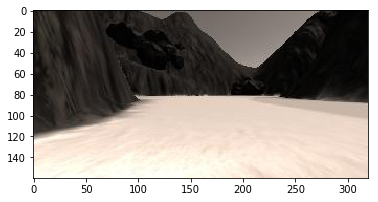

<function matplotlib.pyplot.show>

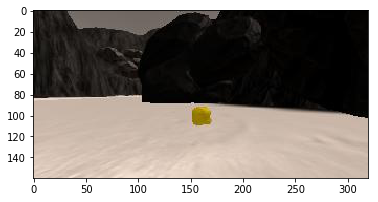

In [4]:
# Import some packages from matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
%matplotlib inline

# Define the filename, read and plot the image
filename = 'sample.jpg'
filename2 = '../calibration_images/example_rock1.jpg'
image = mpimg.imread(filename)
image_rock = mpimg.imread(filename2)
plt.imshow(image)
plt.show()
plt.imshow(image_rock)
plt.show

## Creating a function to perform a color threshold

### using numpy to work with arrays

In [5]:
import numpy as np
print(image.dtype, image.shape, np.min(image), np.max(image))

uint8 (160, 320, 3) 0 255


It's an 8-bit unsigned integer array (uint8), where the size of the array is (160, 320, 3) meaning the image size is 160 pixels in the y-direction (height), 320 pixels in the x-direction (width) and it has 3 layers or "color channels". 
We can also see that the minimum and maximum values are 0 and 255, respectively. This comes from the fact that with 8 bits of information for each pixel in each color channel, you have 2
​8
​​ or 256 possible values, with the minimum possible value being 0 and the maximum being 255. Not all images are scaled this way so it's always a good idea to check the range and data type of the array after reading in an image if you're not sure. 
The three color channels of the image are red, green and blue or "RGB" for short. The combination of intensity values across the three channels determines what color we see in the image. You can look at each of the color channels in isolation by zeroing out the others and lining them up side by side like this:

### separating the RGB channels by zerroing each time two out 

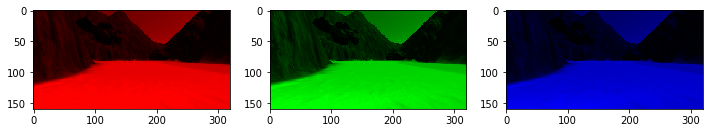

In [6]:
# Note: we use the np.copy() function rather than just saying red_channel = image
# because in Python, such a statement would set those two arrays equal to each other
# forever, meaning any changes made to one would also be made to the other!
red_channel = np.copy(image)
# Note: here instead of extracting individual channels from the image
# I'll keep all 3 color channels in each case but set the ones I'm not interested 
# in to zero.  
red_channel[:,:,[1, 2]] = 0 # Zero out the green and blue channels
green_channel = np.copy(image)
green_channel[:,:,[0, 2]] = 0 # Zero out the red and blue channels
blue_channel = np.copy(image)
blue_channel[:,:,[0, 1]] = 0 # Zero out the red and green channels
fig = plt.figure(figsize=(12,3)) # Create a figure for plotting
plt.subplot(131) # Initialize subplot number 1 in a figure that is 3 columns 1 row
plt.imshow(red_channel) # Plot the red channel
plt.subplot(132) # Initialize subplot number 2 in a figure that is 3 columns 1 row
plt.imshow(green_channel)  # Plot the green channel
plt.subplot(133) # Initialize subplot number 3 in a figure that is 3 columns 1 row
plt.imshow(blue_channel)  # Plot the blue channel
plt.show()

### defining the actual function

In [18]:
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select
    
# Define color selection criteria
###### TODO: MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 160
green_threshold = 160
blue_threshold = 160
######

def color_thresh_rock(img, rgb_thresh=(0, 0, 0)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1]  > rgb_thresh[1]) \
                & (img[:,:,2] < rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

### call the function and create the output

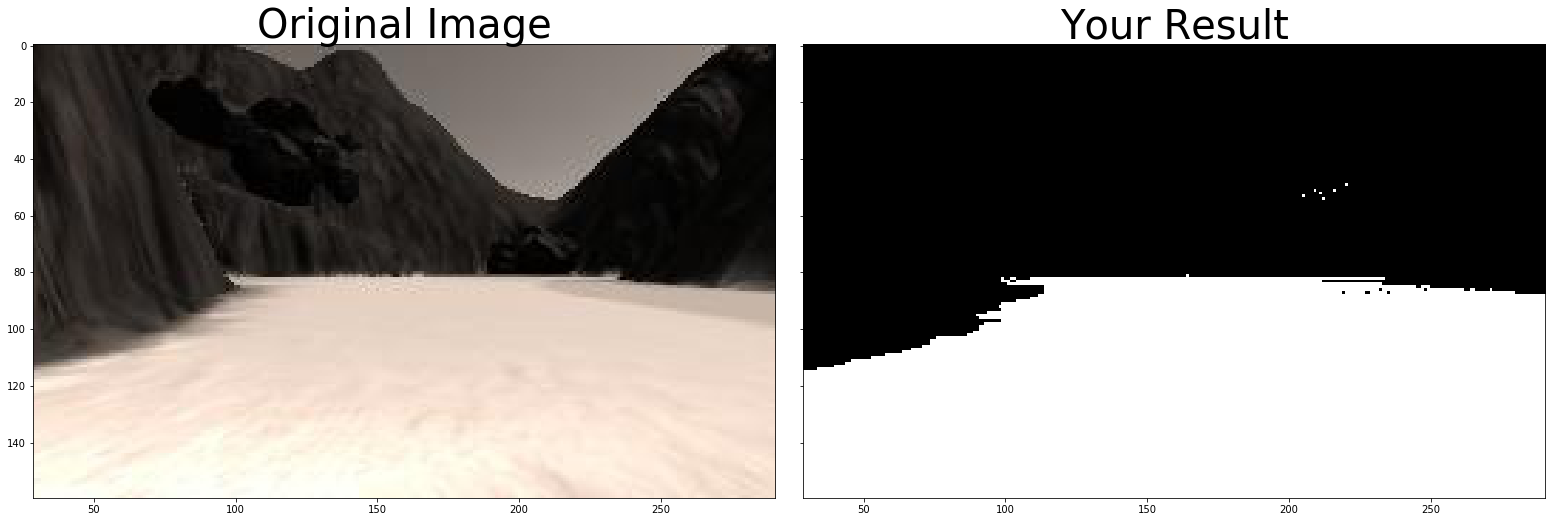

In [8]:
rgb_threshold = (red_threshold, green_threshold, blue_threshold)

# pixels below the thresholds
colorsel = color_thresh(image, rgb_thresh=rgb_threshold)

# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(colorsel, cmap='gray')
ax2.set_title('Your Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Finding the rock threshold

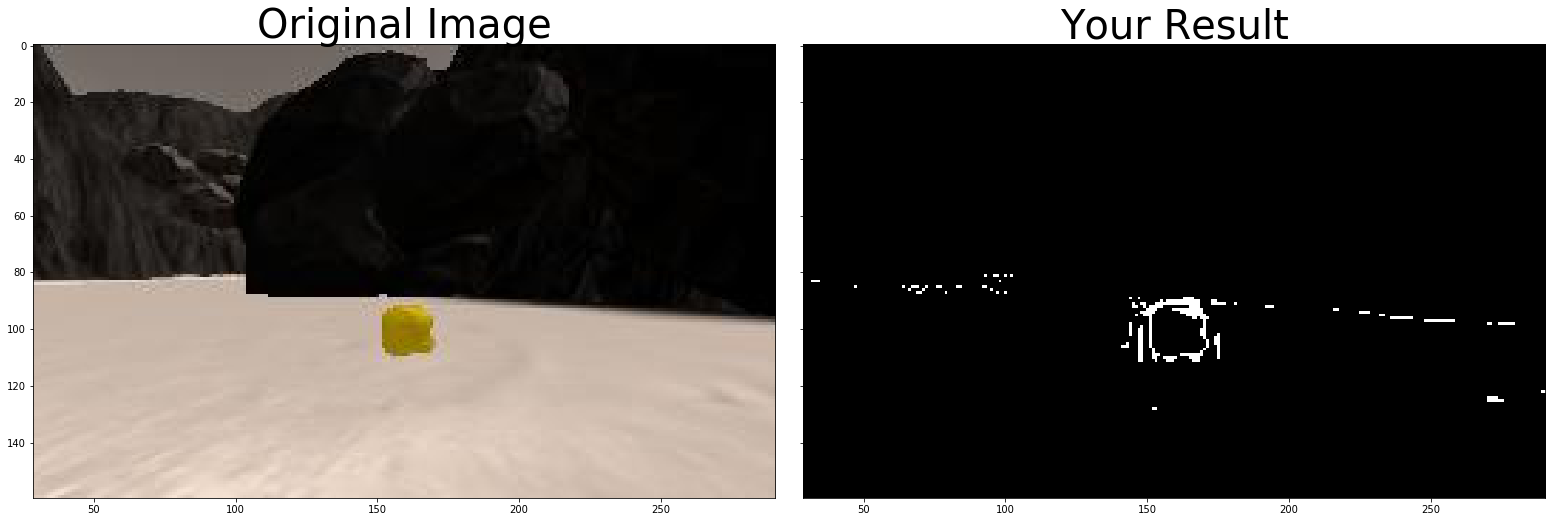

In [19]:
red_threshold = 160
green_threshold = 160
blue_threshold = 160

rgb_threshold_rock = (red_threshold, green_threshold, blue_threshold)

# pixels below the thresholds
colorsel = color_thresh_rock(image_rock, rgb_thresh=rgb_threshold)

# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()
ax1.imshow(image_rock)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(colorsel, cmap='gray')
ax2.set_title('Your Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)